In [ ]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("/work/sy09/data/penguins_for_machine_learning.csv")

In [ ]:
data.head()

,Biscoe,Dream,Torgersen,species,bill_length,bill_depth,flipper_length,body_mass,del15,del13
0,0.0,0.0,1.0,Adelie,39.1,18.7,181.0,3750.0,8.859733,-25.804194
1,0.0,0.0,1.0,Adelie,39.5,17.4,186.0,3800.0,8.949560,-24.694540
2,0.0,0.0,1.0,Adelie,40.3,18.0,195.0,3250.0,8.368210,-25.333020
3,0.0,0.0,1.0,Adelie,36.7,19.3,193.0,3450.0,8.766510,-25.324260
4,0.0,0.0,1.0,Adelie,39.3,20.6,190.0,3650.0,8.664960,-25.298050


In [ ]:
# Gaussian NB

x = data.drop('species', axis=1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

model_Gaussian = GaussianNB()
# training
model_Gaussian.fit(x_train, y_train)
# prediction
prediction = model_Gaussian.predict(x_test)
# model accuracy
precision = accuracy_score(y_test, prediction)*100
print(precision)

print(confusion_matrix(prediction, y_test))
print(classification_report(y_test, prediction, digits=3))

96.46017699115043
[[41  0  0]
 [ 4 27  0]
 [ 0  0 41]]
              precision    recall  f1-score   support

      Adelie      1.000     0.911     0.953        45
   Chinstrap      0.871     1.000     0.931        27
      Gentoo      1.000     1.000     1.000        41

    accuracy                          0.965       113
   macro avg      0.957     0.970     0.962       113
weighted avg      0.969     0.965     0.965       113



In [ ]:
# Bernoulli NB

x = data.drop('species', axis=1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
model_Bernoulli = BernoulliNB()
# training
model_Bernoulli.fit(x_train, y_train)
# prediction
prediction = model_Bernoulli.predict(x_test)
# model accuracy
precision = accuracy_score(y_test, prediction)*100
print(precision)

73.45132743362832


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.9557522123893806
[[53  2  1]
 [ 1 26  0]
 [ 1  0 29]]
              precision    recall  f1-score   support

      Adelie      0.946     0.964     0.955        55
   Chinstrap      0.963     0.929     0.945        28
      Gentoo      0.967     0.967     0.967        30

    accuracy                          0.956       113
   macro avg      0.959     0.953     0.956       113
weighted avg      0.956     0.956     0.956       113



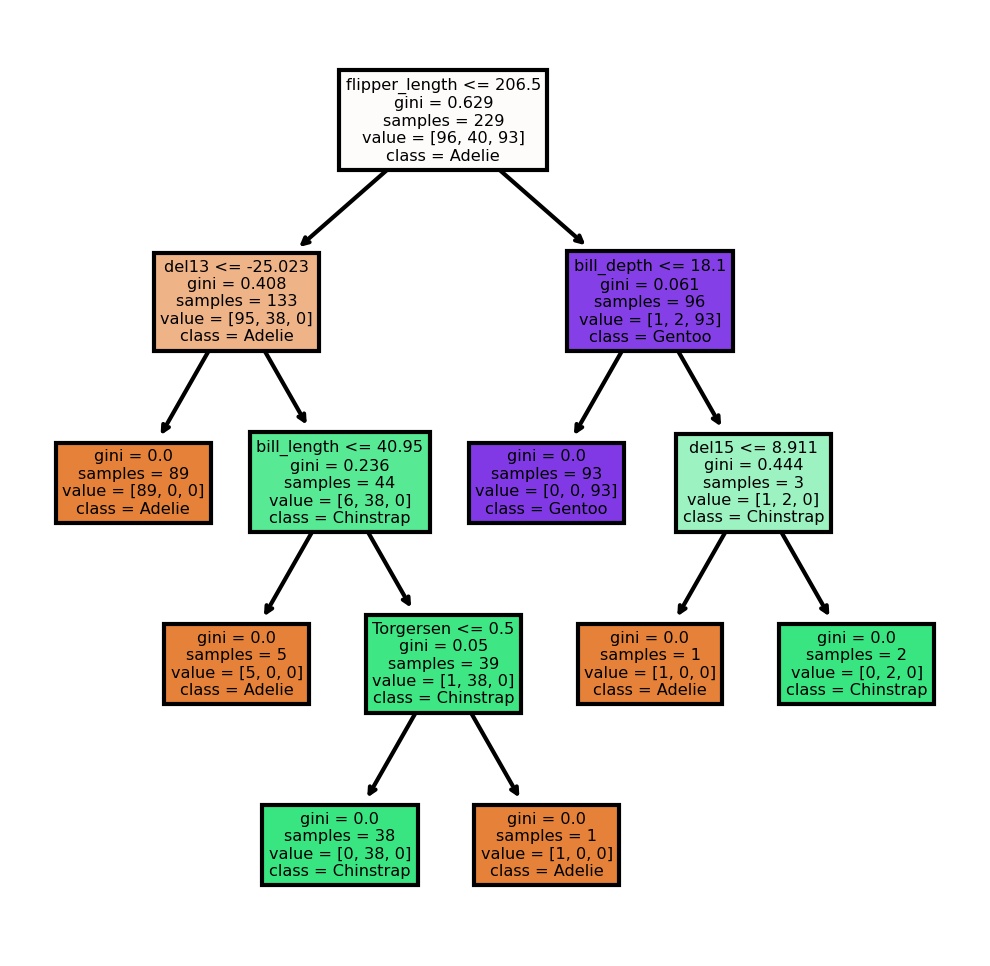

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

fn=['Biscoe','Dream','Torgersen','bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'del15', 'del13']
cn=['Adelie', 'Chinstrap', 'Gentoo']

clf = DecisionTreeClassifier()

x = data.drop('species', axis=1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

print("Accuracy:", accuracy_score(y_test, y_pred))

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

x = data.drop('species', axis=1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 0.9734513274336283
[[41  1  0]
 [ 1 21  0]
 [ 1  0 48]]
              precision    recall  f1-score   support

      Adelie      0.976     0.953     0.965        43
   Chinstrap      0.955     0.955     0.955        22
      Gentoo      0.980     1.000     0.990        48

    accuracy                          0.973       113
   macro avg      0.970     0.969     0.970       113
weighted avg      0.973     0.973     0.973       113



In [ ]:
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

X = data.drop('species', axis=1).to_numpy()
y = data['species'].to_numpy()

# X = data.loc[:, ["X1", "X2"]].to_numpy()
# Y = data.loc[:, 'z'].to_numpy()

cv_outer = StratifiedKFold(n_splits=50, random_state=1729, shuffle=True)

# NESTED CROSS VALIDATION 
err_cv_nested = pd.DataFrame()
# (1) outer cross validation 
for idx_train, idx_test in cv_outer.split(X, y):
  X_outer_train, y_outer_train = X[idx_train], y[idx_train]
  X_outer_test, y_outer_test = X[idx_test], y[idx_test]

  # (2.2) Logistic regression (modèle avec de paramètres)
  logistic_model = LogisticRegression(penalty='none', max_iter=10000)
  logistic_model.fit(X_outer_train, y_outer_train)

  # (1.1) Computing real accuracy 
  y_pred_logistic = logistic_model.predict(X_outer_test)
  # accuracy 
  acc_logistic = accuracy_score(y_pred_logistic, y_outer_test)
  err_cv_nested = err_cv_nested.append({"model": "logistic", "accuracy": acc_logistic},ignore_index=True)

err_cv_nested

,accuracy,model
0,1.000000,logistic
1,0.857143,logistic
2,1.000000,logistic
3,1.000000,logistic
4,1.000000,logistic
5,1.000000,logistic
6,1.000000,logistic
7,1.000000,logistic
8,1.000000,logistic
9,1.000000,logistic


In [ ]:
# RANDOM FORESTS: Nested cross validation on max_depth varying vs max_depth=2

X = data.drop('species', axis=1).to_numpy()
y = data['species'].to_numpy()

cv_outer = StratifiedKFold(n_splits=10, shuffle=True)

# NESTED CROSS VALIDATION 
err_cv_nested = pd.DataFrame()
# (1) outer cross validation 
for idx_train, idx_test in cv_outer.split(X, y):
  X_outer_train, y_outer_train = X[idx_train], y[idx_train]
  X_outer_test, y_outer_test = X[idx_test], y[idx_test]

  # (2) inner cross validation
  # (2.1) Random Forest  (modèle avec hyper-paramètres)
  max_depth_list = np.arange(5, 50, 5)
  param_grid = {"max_depth": max_depth_list}
  clf = RandomForestClassifier()
  rf_model = RandomForestClassifier(max_depth=2)
  search_rf = GridSearchCV(clf, param_grid, scoring="accuracy", cv=10)
  search_rf.fit(X_outer_train, y_outer_train)
  # training the knn model utilisant optimal K
  rf_cv_model = RandomForestClassifier(max_depth=search_rf.best_params_["max_depth"])
  rf_cv_model.fit(X_outer_train, y_outer_train)
  rf_model.fit(X_outer_train, y_outer_train)

  print(search_rf.best_params_["max_depth"])

  # (1.1) Computing real accuracy 
  y_pred_rf_cv = rf_cv_model.predict(X_outer_test)
  y_pred_rf = rf_model.predict(X_outer_test)
  # accuracy 
  acc_rf_cv = accuracy_score(y_pred_rf_cv, y_outer_test)
  acc_rf = accuracy_score(y_pred_rf, y_outer_test)
  err_cv_nested = err_cv_nested.append({"model": "rf_cv", "accuracy": acc_rf_cv},ignore_index=True)
  err_cv_nested = err_cv_nested.append({"model": "rf", "accuracy": acc_rf},ignore_index=True)

err_cv_nested

# Une majorité de 100% de prédiction malgré la CV sur max_depth et le partitionnement aléatoire : max_depth pas important? trop peu de données pour éviter l'overfitting?

5
15


KeyboardInterrupt: 

In [ ]:
# RANDOM FORESTS: Nested cross validation on n_estimators varying vs n_estimators=100

X = data.drop('species', axis=1).to_numpy()
y = data['species'].to_numpy()

cv_outer = StratifiedKFold(n_splits=10, random_state=967, shuffle=True)

# NESTED CROSS VALIDATION 
err_cv_nested = pd.DataFrame()
# (1) outer cross validation 
for idx_train, idx_test in cv_outer.split(X, y):
  X_outer_train, y_outer_train = X[idx_train], y[idx_train]
  X_outer_test, y_outer_test = X[idx_test], y[idx_test]

  # (2) inner cross validation
  # (2.1) Random Forest  (modèle avec hyper-paramètres)
  n_estimators_list = np.arange(100, 250, 50)
  param_grid = {"n_estimators": n_estimators_list}
  clf = RandomForestClassifier()
  rf_model = RandomForestClassifier(n_estimators=100)
  search_rf = GridSearchCV(clf, param_grid, scoring="accuracy", cv=10)
  search_rf.fit(X_outer_train, y_outer_train)
  # training the knn model utilisant optimal K
  rf_cv_model = RandomForestClassifier(max_depth=search_rf.best_params_["n_estimators"])
  rf_cv_model.fit(X_outer_train, y_outer_train)
  rf_model.fit(X_outer_train, y_outer_train)

  print(search_rf.best_params_["n_estimators"])

  # (1.1) Computing real accuracy 
  y_pred_rf_cv = rf_cv_model.predict(X_outer_test)
  y_pred_rf = rf_model.predict(X_outer_test)
  # accuracy 
  acc_rf_cv = accuracy_score(y_pred_rf_cv, y_outer_test)
  acc_rf = accuracy_score(y_pred_rf, y_outer_test)
  err_cv_nested = err_cv_nested.append({"model": "rf_cv", "accuracy": acc_rf_cv},ignore_index=True)
  err_cv_nested = err_cv_nested.append({"model": "rf", "accuracy": acc_rf},ignore_index=True)

err_cv_nested

# Une majorité de 100% de prédiction malgré la CV sur n_estimators et le partitionnement aléatoire : au final n_estimators=100 bien souvent le meilleur résultat, trop peu de données pour éviter l'overfitting?

100
100
100
150
150
100
100
100
100
150


,accuracy,model
0,1.000000,rf_cv
1,1.000000,rf
2,0.971429,rf_cv
3,0.971429,rf
4,1.000000,rf_cv
5,1.000000,rf
6,1.000000,rf_cv
7,1.000000,rf
8,1.000000,rf_cv
9,1.000000,rf


In [ ]:
X = data.drop('species', axis=1).to_numpy()
y = data['species'].to_numpy()

cv_outer = StratifiedKFold(n_splits=50, random_state=3569, shuffle=True)

# NESTED CROSS VALIDATION 
err_cv_nested = pd.DataFrame()
# (1) outer cross validation 
for idx_train, idx_test in cv_outer.split(X, y):
  X_outer_train, y_outer_train = X[idx_train], y[idx_train]
  X_outer_test, y_outer_test = X[idx_test], y[idx_test]

  # (2.2) Decision Tree
  logistic_model = DecisionTreeClassifier()
  logistic_model.fit(X_outer_train, y_outer_train)

  # (1.1) Computing real accuracy 
  y_pred_logistic = logistic_model.predict(X_outer_test)
  # accuracy 
  acc_tree = accuracy_score(y_pred_logistic, y_outer_test)
  err_cv_nested = err_cv_nested.append({"model": "decision_tree", "accuracy": acc_tree},ignore_index=True)

err_cv_nested

,accuracy,model
0,1.000000,decision_tree
1,1.000000,decision_tree
2,1.000000,decision_tree
3,1.000000,decision_tree
4,1.000000,decision_tree
5,0.714286,decision_tree
6,1.000000,decision_tree
7,1.000000,decision_tree
8,1.000000,decision_tree
9,1.000000,decision_tree


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1dd35576-464a-4d46-a0e6-752fc35b7463' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>